In [1]:
import geopandas as gpd

## Dataset Used : [Kiva Loans Dataset](https://www.kaggle.com/alexisbcook/geospatial-learn-course-data?select=kiva_loans)

## 1) Read the shapefile and create a GeoDataFrame `world_loans`.  

In [2]:
world_loans = gpd.read_file("/home/lippi/100daysofMLcode/9_Kiva_Loans_Philippines_Map/kiva_loans/kiva_loans.shp")
world_loans.head(3)

,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
0,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,450,POINT (102.89751 13.66726)
1,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,20275,POINT (102.98962 13.02870)
2,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,9150,POINT (102.98962 13.02870)


## 2) Load a GeoDataFrame `world` containing country boundaries Using the geopandas world data

In [3]:
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


## 3) Use the `world` and `world_loans` GeoDataFrames to visualize Kiva loan locations across the world.

<AxesSubplot:>

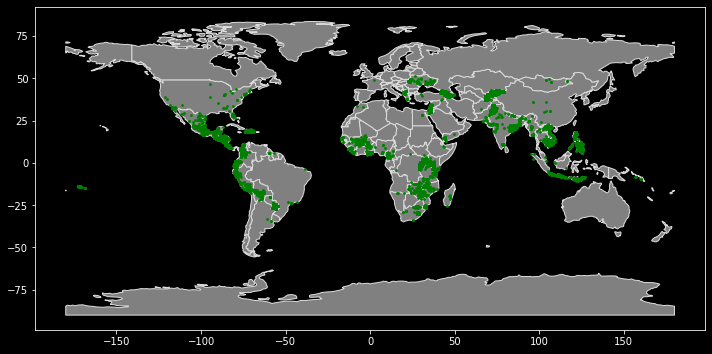

In [4]:
ax = world.plot(figsize=(12,12), color='gray', edgecolor='gainsboro', zorder=1)
world_loans.plot(color='green',ax =ax,markersize=3)

## 4) Select loans based in the Philippines.Create a GeoDataFrame `PHL_loans` which contains all rows from `world_loans` with loans that are based in the Philippines.

In [5]:
PHL_loans = world_loans[world_loans["country"]=="Philippines"]
PHL_loans.head(3)

,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
2859,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,400,POINT (121.73961 17.64228)
2860,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,400,POINT (121.74169 17.63235)
2861,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,400,POINT (121.46667 16.60000)


## 5)  Load a GeoDataFrame `PHL` containing boundaries for all islands in the Philippines.

In [6]:
# Load a KML file containing island boundaries
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
PHL = gpd.read_file("/home/lippi/100daysofMLcode/9_Kiva_Loans_Philippines_Map/Philippines_AL258.kml", driver='KML')
PHL.head()

,Name,Description,geometry
0,Autonomous Region in Muslim Mindanao,,"MULTIPOLYGON (((119.46690 4.58718, 119.46653 4..."
1,Bicol Region,,"MULTIPOLYGON (((124.04577 11.57862, 124.04594 ..."
2,Cagayan Valley,,"MULTIPOLYGON (((122.51581 17.04436, 122.51568 ..."
3,Calabarzon,,"MULTIPOLYGON (((120.49202 14.05403, 120.49201 ..."
4,Caraga,,"MULTIPOLYGON (((126.45401 8.24400, 126.45407 8..."


## 6) Use the `PHL` and `PHL_loans` GeoDataFrames to visualize loans in the Philippines.

<AxesSubplot:>

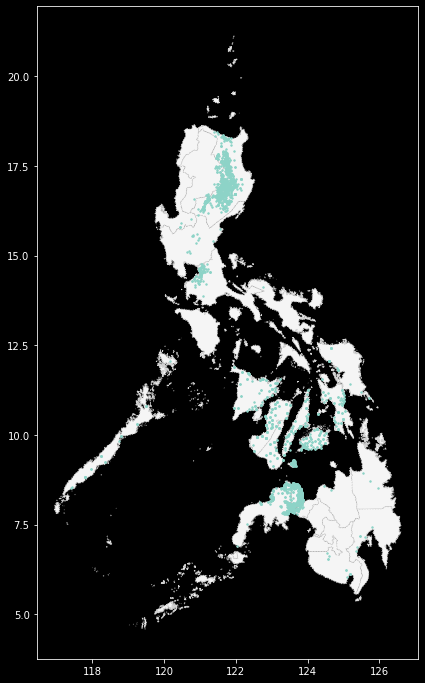

In [7]:
phl = PHL.plot(figsize=(12,12),color='whitesmoke', linestyle=':', edgecolor='lightgray')
PHL_loans.plot(ax = phl, markersize=2)